In [197]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [198]:
df_raw = pd.read_csv("CV_results.csv")

In [199]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               50 non-null     int64  
 1   mean_fit_time            50 non-null     float64
 2   std_fit_time             50 non-null     float64
 3   mean_score_time          50 non-null     float64
 4   std_score_time           50 non-null     float64
 5   param_nrounds            50 non-null     float64
 6   param_min_child_weight   50 non-null     float64
 7   param_lambda             50 non-null     float64
 8   param_eta                50 non-null     float64
 9   param_colsample_bytree   50 non-null     float64
 10  param_colsample_bylevel  50 non-null     float64
 11  param_alpha              50 non-null     float64
 12  params                   50 non-null     object 
 13  split0_test_roc_auc      50 non-null     float64
 14  split1_test_roc_auc      50 

In [200]:
# Features selection
cols = ["mean_fit_time", "param_nrounds", 
        "param_min_child_weight", "param_lambda",
        "param_eta", "param_colsample_bytree",
        "param_colsample_bylevel", "param_alpha",
        #"rank_test_roc_auc", 
        #"rank_test_f1", 
        #"rank_test_accuracy",
       ]
df = df_raw[cols]

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

## T-SNE
- odpada: niestabilne działanie, prawdopodobnie za małe dane

In [201]:
tsne = TSNE(n_components=2, perplexity=10, n_iter=500)
tsne_results = tsne.fit_transform(df)

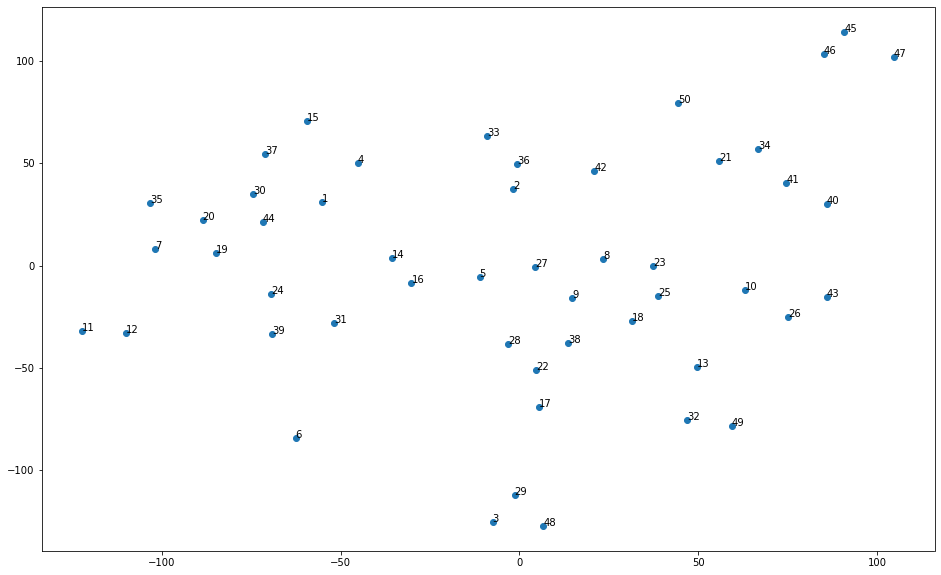

In [202]:
df['tsne-2d-one'] = tsne_results.T[0]
df['tsne-2d-two'] = tsne_results.T[1]
fig, ax = plt.subplots(figsize=(16,10))
ax.scatter(df['tsne-2d-one'], df['tsne-2d-two'])
for i, txt in enumerate(df_raw['rank_test_roc_auc']):
    ax.annotate(txt, (df['tsne-2d-one'][i], df['tsne-2d-two'][i]))

## PCA

In [203]:
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df.iloc[:,:(len(df.columns)-2)])

In [204]:
from sklearn.cluster import KMeans

In [205]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [206]:
kmeans.fit(pca)

KMeans(n_clusters=5, random_state=0)

In [207]:
y = kmeans.predict(pca)

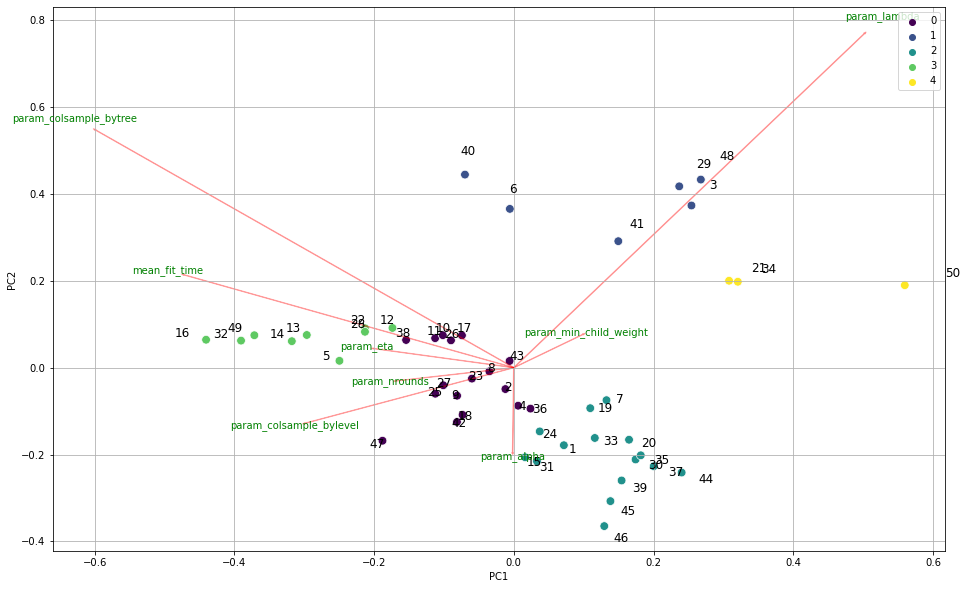

In [208]:
def myplot(score,coeff,points,hue,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots(figsize=(16,10))
    #ax.scatter(xs * scalex,ys * scaley,s=5)
    sns.scatterplot(x=(xs*scalex), y=(ys*scalex), hue=hue, palette='viridis', s=75)
    for i, txt in enumerate(points):
        ax.annotate(txt, (1.102*(xs*scalex)[i], 1.102*(ys*scalex)[i]), fontsize=12)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.3)
        if labels is None:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.05, coeff[i,1] * 1.05, labels[i], color = 'g', ha = 'center', va = 'center')
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.show()

myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),df_raw['rank_test_roc_auc'], y, (df.columns))

In [213]:
y

array([1, 0, 2, 2, 0, 2, 1, 0, 1, 3, 2, 0, 3, 2, 0, 2, 0, 0, 1, 0, 3, 0,
       0, 2, 3, 4, 4, 1, 0, 2, 2, 3, 4, 3, 3, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 3, 1, 3])

In [214]:
# with open('clusters.npy', 'wb') as f:
#     np.save(f, y)